Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [13]:
library('tidyverse')
library('palmerpenguins')
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [16]:
options(rep.plot.width = 8) 

penguins2 = penguins |> 
    pivot_longer(c(bill_length_mm, bill_depth_mm, flipper_length_mm), 
                 names_to = 'key', values_to = 'value') 


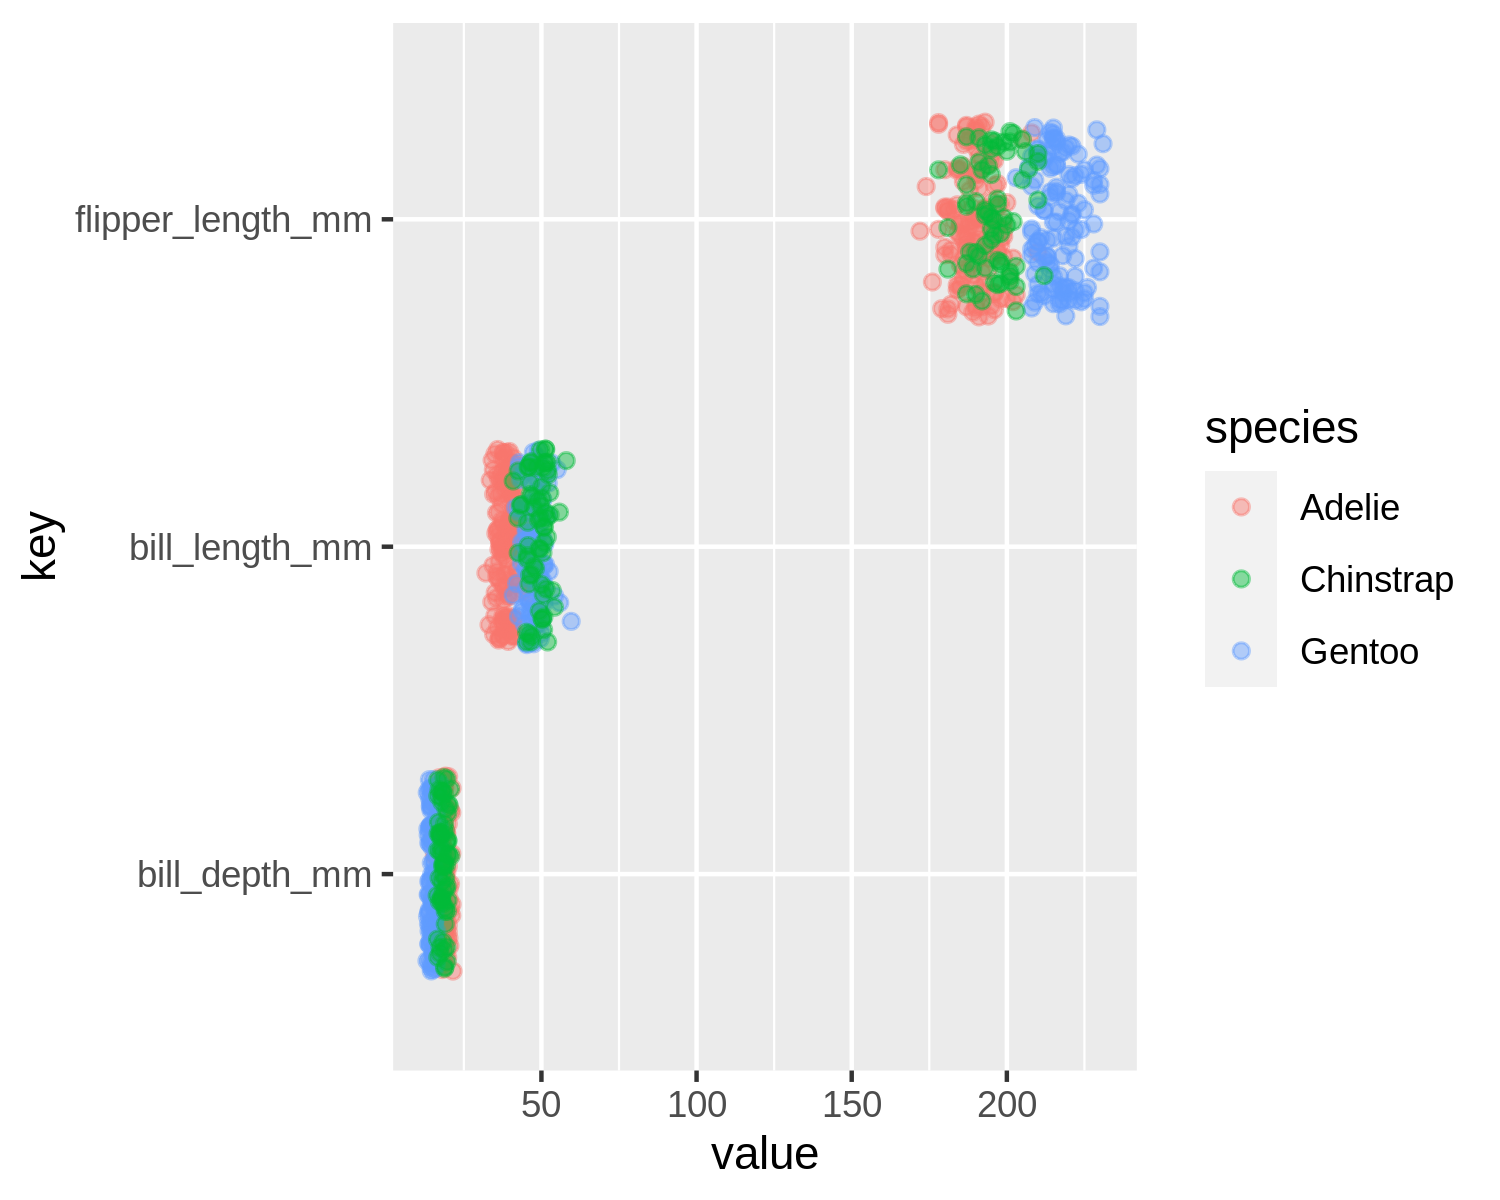

In [19]:
p = ggplot(penguins2, aes(x = value, y = key, color = species)) + 
    geom_point(position = position_jitter(height = 0.3, width = 0), alpha = 0.45, na.rm = T) 
p

We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing *individual measurement values* by the *maximum value* within the measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

In [26]:
#create normalized value: 
penguins2 = penguins2 |> 
    group_by(species) |> 
    mutate(value_normalized = value / max(value, na.rm = TRUE))

Now make the chart.

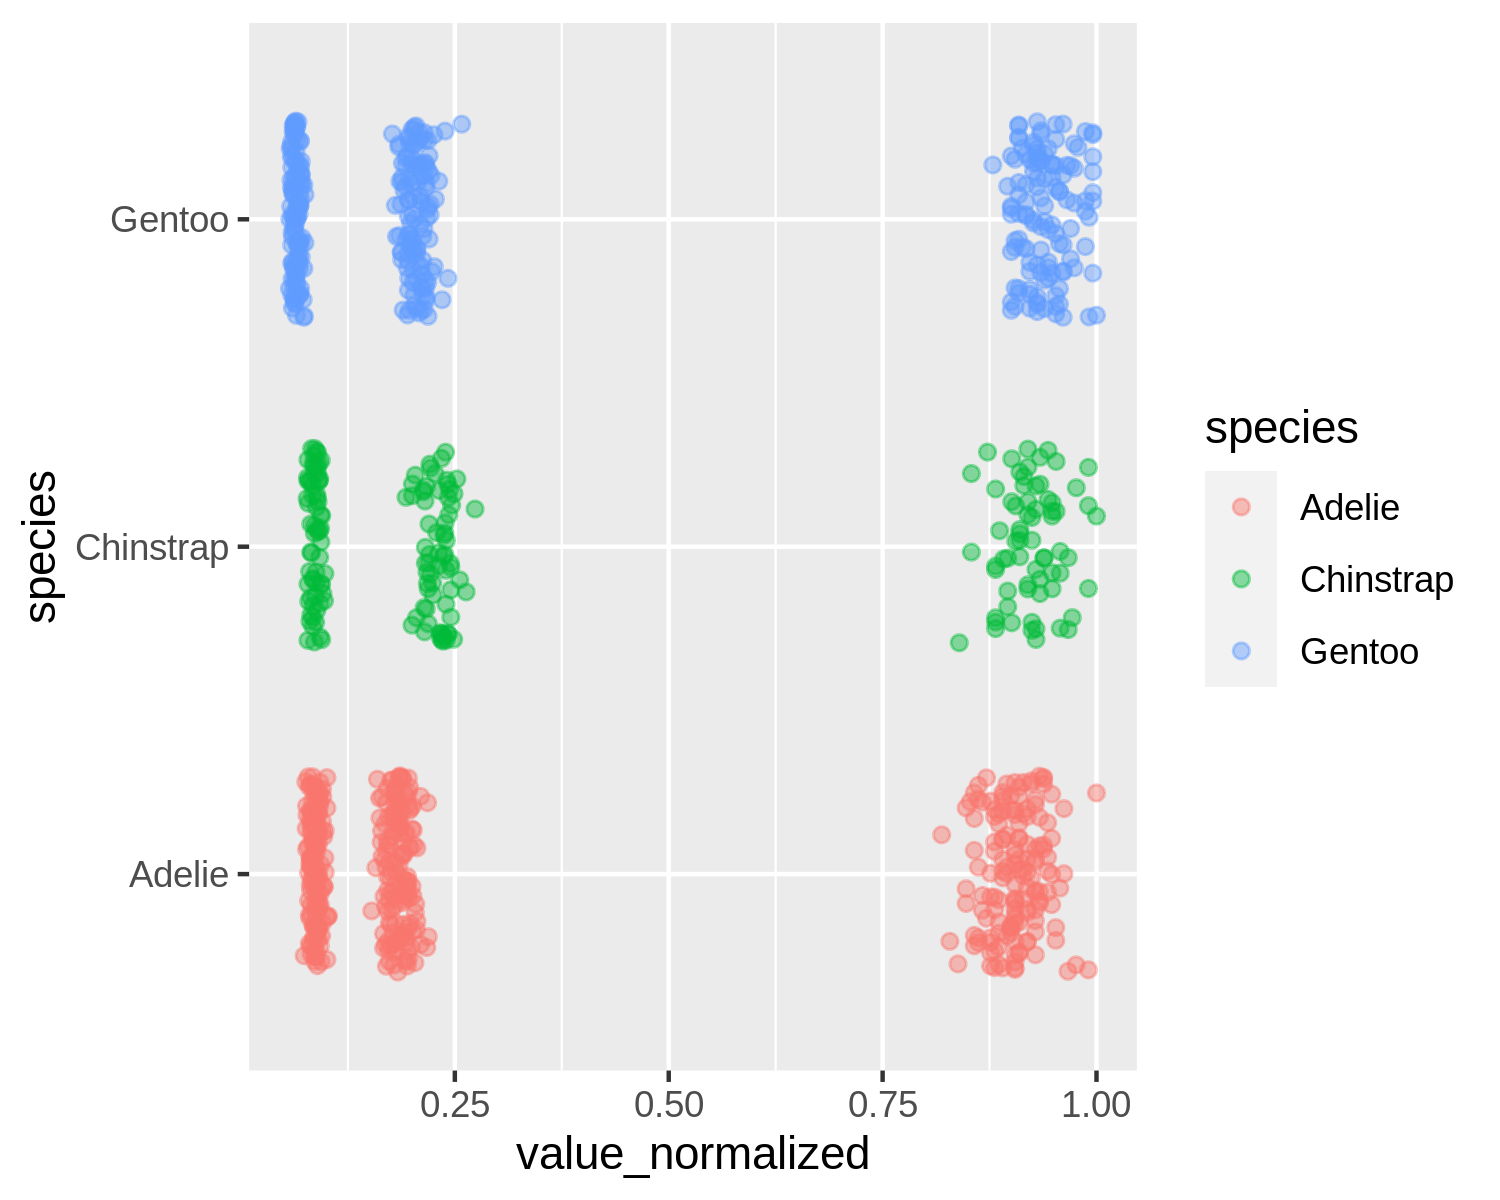

In [30]:
p = ggplot(penguins2, aes(x = value_normalized, y = species, color = species)) + 
    geom_point(position = position_jitter(height = 0.3, width = 0), alpha = 0.45, na.rm = T) 
p